### Question 1: Count of Plans

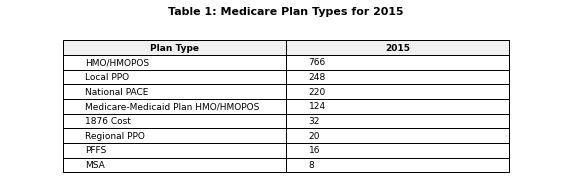

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# Construct file paths dynamically
contract_info_path = '/Users/ilsenovis/Documents/GitHub/ECON470/data/input/CPSC_Contract_Info_2015_01.csv'
enroll_info_path = '/Users/ilsenovis/Documents/GitHub/ECON470/data/input/CPSC_Enrollment_Info_2015_01.csv'
county_sa_info_path = '/Users/ilsenovis/Documents/GitHub/ECON470/data/input/MA_Cnty_SA_2015_01.csv'

# Read in your datasets using the dynamically constructed paths
contract_info = pd.read_csv(contract_info_path, encoding='ISO-8859-1')
enroll_info = pd.read_csv(enroll_info_path, encoding='ISO-8859-1')
county_sa_info = pd.read_csv(county_sa_info_path, encoding='ISO-8859-1')

#print(enroll_info.columns)
#print(county_sa_info.columns)
#print(contract_info.columns)

# Rename 'Contract Number' to 'Contract ID' in enroll_info
enroll_info.rename(columns={'Contract Number': 'Contract ID'}, inplace=True)

#Check column names
#print(enroll_info.columns)
#print(county_sa_info.columns)
#print(contract_info.columns)

#Check size
#print(enroll_info.shape)
#print(county_sa_info.shape)
#print(contract_info.shape)

# Remove duplicates based on 'Contract ID'
enroll_info = enroll_info.drop_duplicates(subset=['Contract ID'])
county_sa_info = county_sa_info.drop_duplicates(subset=['Contract ID'])
contract_info = contract_info.drop_duplicates(subset=['Contract ID'])

# Check the new shapes after removing duplicates
#print(enroll_info.shape)
#print(county_sa_info.shape)
#print(contract_info.shape)

# Merge enroll_info with county_sa_info on 'Contract ID'
merged_data = pd.merge(enroll_info, county_sa_info, on='Contract ID', how='inner')

# Merge the above result with contract_info on 'Contract ID'
merged_data = pd.merge(merged_data, contract_info, on='Contract ID', how='inner')

# Check the merged dataset
#print(merged_data.head())

# Display all column headers
#print(merged_data.columns.tolist())
#print(merged_data.shape)

# Group by 'Plan Type_x' and count unique 'Plan Name'
plan_type_x_counts = merged_data.groupby('Plan Type_x')['Plan Name'].nunique().reset_index()

# Group by 'Plan Type_y' and count unique 'Plan Name'
plan_type_y_counts = merged_data.groupby('Plan Type_y')['Plan Name'].nunique().reset_index()

# Rename columns for clarity
plan_type_x_counts.columns = ['Plan Type', 'Number of Unique Plans (Type_x)']
plan_type_y_counts.columns = ['Plan Type', 'Number of Unique Plans (Type_y)']

# Count the occurrences of each unique plan type in Plan Type_x and Plan Type_y
plan_type_x_counts = merged_data['Plan Type_x'].value_counts()
plan_type_y_counts = merged_data['Plan Type_y'].value_counts()

# Combine the counts by adding them
combined_counts = plan_type_x_counts.add(plan_type_y_counts, fill_value=0)

# Convert the result to a DataFrame for clarity
plan_type_counts = combined_counts.reset_index()

# Rename columns for clarity
plan_type_counts.columns = ['Plan Type', '2015']

# Create a table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=plan_type_counts.values, 
                 colLabels=plan_type_counts.columns, 
                 cellLoc='left',  # Left-align cell text
                 colColours=["#f0f0f0"] * len(plan_type_counts.columns),
                 loc='center',
                 colWidths=[0.4, 0.4])

for key, cell in table.get_celld().items():
    cell.set_height(0.09)

# Format column headers (bold and centered)
for (i, key) in enumerate(plan_type_counts.columns):
    table[0, i].set_text_props(ha='center', weight='bold')

plt.title("Table 1: Medicare Plan Types for 2015", fontsize=11, fontweight="bold", pad=10)
plt.show()

### Question 2: Removing Specific Plans

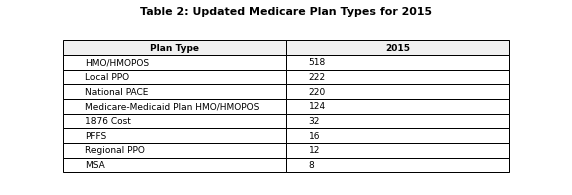

In [2]:
# Check column names for each dataset
#print(county_sa_info.columns.tolist())
#print(contract_info.columns.tolist())
#print(enroll_info.columns.tolist())

# Clean datasets separately
# Remove 800-series plans from 'contract_info' and 'enroll_info'
contract_info_cleaned = contract_info[~contract_info['Plan ID'].astype(str).str.startswith('800')].copy()
enroll_info_cleaned = enroll_info[~enroll_info['Plan ID'].astype(str).str.startswith('800')].copy()

# Remove SNP and EGHP plans in contract_info_cleaned
contract_info_cleaned = contract_info_cleaned[contract_info_cleaned['SNP Plan'] != 'Yes']
contract_info_cleaned = contract_info_cleaned[contract_info_cleaned['EGHP'] != 'Yes']

# Now merge the cleaned datasets
merged_cleaned_data = pd.merge(enroll_info_cleaned, county_sa_info, on='Contract ID', how='inner')
merged_cleaned_data = pd.merge(merged_cleaned_data, contract_info_cleaned, on='Contract ID', how='inner')

# Verify the merged and cleaned data
#print(f"Merged cleaned data shape: {merged_cleaned_data.shape}")
#print(merged_cleaned_data.head())

# Group by 'Plan Type_x' and 'Plan Type_y' to count unique 'Plan Name'
plan_type_x_counts_cleaned = merged_cleaned_data.groupby('Plan Type_x')['Plan Name'].nunique().reset_index()
plan_type_y_counts_cleaned = merged_cleaned_data.groupby('Plan Type_y')['Plan Name'].nunique().reset_index()

# Rename columns for clarity
plan_type_x_counts_cleaned.columns = ['Plan Type', 'Number of Unique Plans (Type_x)']
plan_type_y_counts_cleaned.columns = ['Plan Type', 'Number of Unique Plans (Type_y)']

# Count the occurrences of each unique plan type in Plan Type_x and Plan Type_y for cleaned data
plan_type_x_counts_cleaned = merged_cleaned_data['Plan Type_x'].value_counts()
plan_type_y_counts_cleaned = merged_cleaned_data['Plan Type_y'].value_counts()

# Combine the counts by adding them
combined_counts_cleaned = plan_type_x_counts_cleaned.add(plan_type_y_counts_cleaned, fill_value=0)

# Convert the result to a DataFrame for clarity
plan_type_counts_cleaned = combined_counts_cleaned.reset_index()

# Check the size of the cleaned merged dataset before creating Table 2
#print(f"Size of merged cleaned dataset: {merged_cleaned_data.shape}")

# Rename columns for clarity
plan_type_counts_cleaned.columns = ['Plan Type', '2015']

# Create a table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=plan_type_counts_cleaned.values, 
                 colLabels=plan_type_counts_cleaned.columns, 
                 cellLoc='left',
                 colColours=["#f0f0f0"] * len(plan_type_counts_cleaned.columns),
                 loc='center',
                 colWidths=[0.4, 0.4])

for key, cell in table.get_celld().items():
    cell.set_height(0.09)

# Format column headers (bold and centered)
for (i, key) in enumerate(plan_type_counts_cleaned.columns):
    table[0, i].set_text_props(ha='center', weight='bold')

plt.title("Table 2: Updated Medicare Plan Types for 2015", fontsize=11, fontweight="bold", pad=10)
plt.show()

### Question 3: Average Enrollment

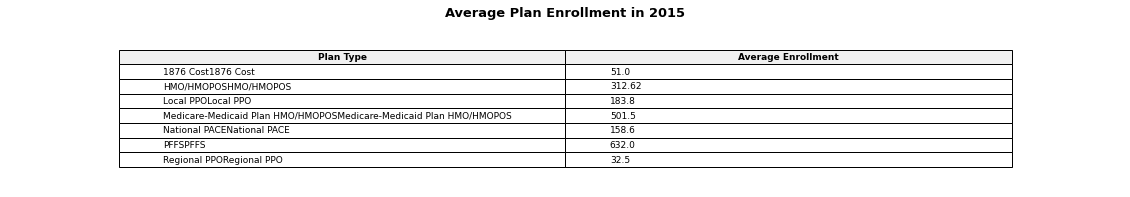

In [3]:
# Convert the 'Enrollment' column to numeric, coercing errors (invalid entries will become NaN)
merged_data['Enrollment'] = pd.to_numeric(merged_data['Enrollment'], errors='coerce')

# Check for NaN values that were created by invalid entries
#print(merged_data['Enrollment'].isna().sum())

# Optionally, remove rows with NaN values in 'Enrollment' if you don't want them to affect the calculations
merged_data = merged_data.dropna(subset=['Enrollment'])

# Combine 'Plan Type_x' and 'Plan Type_y' into a single 'Plan Type' column
merged_data['Plan Type Combined'] = merged_data['Plan Type_x'].fillna('') + merged_data['Plan Type_y'].fillna('')

# Now calculate the average enrollment for each unique 'Plan Type Combined'
avg_enrollment = merged_data.groupby('Plan Type Combined')['Enrollment'].mean().reset_index()

# Round the 'Enrollment' column to 2 decimal places
avg_enrollment['Enrollment'] = avg_enrollment['Enrollment'].round(2)

# Rename the columns for clarity (optional)
avg_enrollment.columns = ['Plan Type', 'Average Enrollment']

# Create a table
fig, ax = plt.subplots(figsize=(20, 3))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=avg_enrollment.values, 
                 colLabels=avg_enrollment.columns, 
                 cellLoc='left',
                 colColours=["#f0f0f0"] * len(avg_enrollment.columns),
                 loc='center',
                 colWidths=[0.4, 0.4])

for key, cell in table.get_celld().items():
    cell.set_height(0.09)

# Format column headers
for (i, key) in enumerate(avg_enrollment.columns):
    table[0, i].set_text_props(ha='center', weight='bold')

plt.title("Average Plan Enrollment in 2015", fontsize=13, fontweight="bold", pad=10)
plt.show()

All code files for this project can be found in my [GitHub Repository](https://github.com/ilsenovis18/ECON470)

In [4]:
!jupyter nbconvert --to html --no-input --output exported_notebook.html data-build.ipynb

[NbConvertApp] Converting notebook data-build.ipynb to html
[NbConvertApp] Writing 644975 bytes to exported_notebook.html
